In [1]:
# data => Salary_Data.csv
# location => https://mitu.co.in/dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Salary_Data.csv')
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [4]:
df.shape

(30, 2)

In [5]:
df.columns

Index(['YearsExperience', 'Salary'], dtype='object')

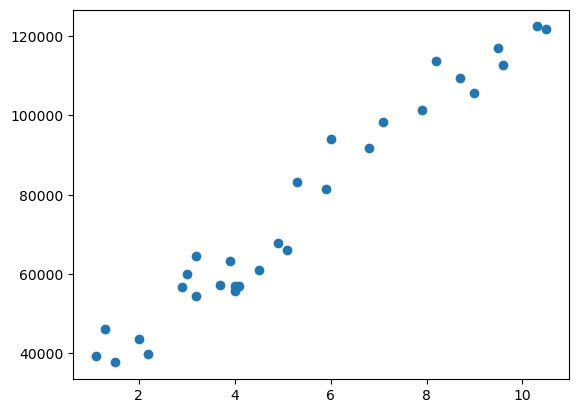

In [6]:
# check linearity
plt.scatter(df['YearsExperience'], df['Salary']);

In [7]:
# separate the data

In [8]:
x = df['YearsExperience'].values   # input
y = df['Salary']   # output

In [9]:
x

array([ 1.1,  1.3,  1.5,  2. ,  2.2,  2.9,  3. ,  3.2,  3.2,  3.7,  3.9,
        4. ,  4. ,  4.1,  4.5,  4.9,  5.1,  5.3,  5.9,  6. ,  6.8,  7.1,
        7.9,  8.2,  8.7,  9. ,  9.5,  9.6, 10.3, 10.5])

In [10]:
x = x.reshape(30,1)
x

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [11]:
# cross validation

In [12]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                   random_state= 0,
                                                   test_size= 0.2)

In [13]:
x_train.shape

(24, 1)

In [14]:
y_train.shape

(24,)

#### Build the model

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
lr = LinearRegression()

In [18]:
lr.fit(x_train, y_train)

LinearRegression()

In [19]:
# predict on testing data

In [20]:
y_pred = lr.predict(x_test)
y_pred

array([ 40748.96184072, 122699.62295594,  64961.65717022,  63099.14214487,
       115249.56285456, 107799.50275317])

In [21]:
# compare predicted and actual values

pd.DataFrame({
    'actual': y_test,
    'predicted': y_pred
})

,actual,predicted
2,37731.0,40748.961841
28,122391.0,122699.622956
13,57081.0,64961.657170
10,63218.0,63099.142145
26,116969.0,115249.562855
24,109431.0,107799.502753


In [55]:
# mean absolute error
sum(abs(y_test - y_pred)) / len(y_pred)

2446.1723690465064

In [57]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

2446.1723690465064

In [59]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

12823412.298126562

In [61]:
# actual accuracy/ r2 score/ coe of determination

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.988169515729126

In [63]:
lr.score(x_test, y_test)

0.988169515729126

In [65]:
# coe / slope
lr.coef_

array([9312.57512673])

In [67]:
lr.intercept_

26780.099150628186

In [71]:
# predict

lr.predict([[12]])

array([138531.00067138])

In [73]:
9312.57512673 * 12 + 26780.099150628186

138531.00067138817

In [75]:
pred_all = lr.predict(x)
pred_all

array([ 37023.93179003,  38886.44681538,  40748.96184072,  45405.24940409,
        47267.76442943,  53786.56701814,  54717.82453082,  56580.33955616,
        56580.33955616,  61236.62711953,  63099.14214487,  64030.39965754,
        64030.39965754,  64961.65717022,  68686.68722091,  72411.7172716 ,
        74274.23229695,  76136.74732229,  81724.29239833,  82655.549911  ,
        90105.61001239,  92899.38255041, 100349.44265179, 103143.21518981,
       107799.50275317, 110593.27529119, 115249.56285456, 116180.82036723,
       122699.62295594, 124562.13798128])

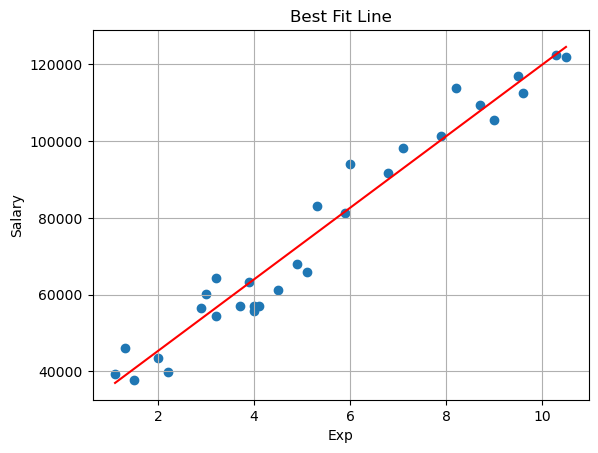

In [79]:
plt.title('Best Fit Line')

plt.xlabel('Exp')
plt.ylabel('Salary')
plt.scatter(x, y)
plt.plot(x, pred_all, color = 'red');
plt.grid()